# **Face and Eye Detection with Haar Cascade Classifiers**

####**In this Project I'll use:**
1. Haarcascade Classifer to detect faces
2. Haarcascade Classifer to detect eyes
3. Haarcascade Classifer to detect faces and eyes from your webcam in Colab


download dataset from given link below and upload it on Colab

https://drive.google.com/drive/folders/1-8ao6q58oEsbjbr5C7YlQRp2ItaWebAM?usp=sharing

https://drive.google.com/file/d/1i-9EOSCFcGX5DyXj26s_F90m7O8zcWvo/view?usp=sharing


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Define  imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip  images and Haarcascade Classifiers

!unzip -qq images.zip
!unzip -qq haarcascades.zip

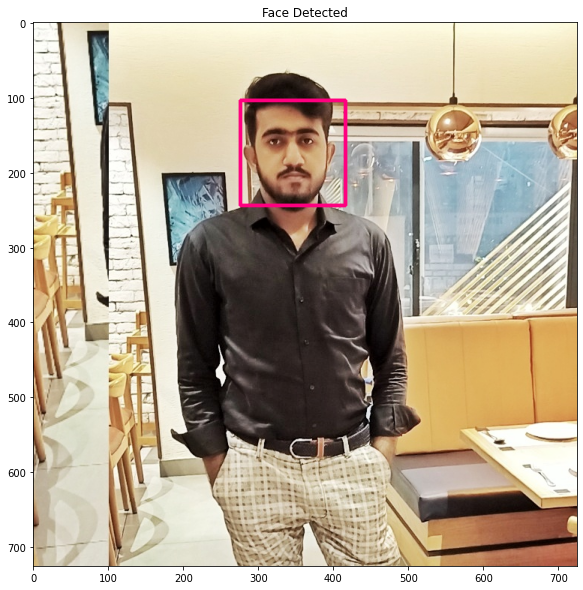

In [27]:
#  point OpenCV's CascadeClassifier function to where  
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_frontalface_default.xml')

# Load  image then convert it to grayscale
image = cv2.imread('/content/My Pic.jpeg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#  classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
  print('No Face Detected')

#  iterate through  faces array and draw a rectangle
# over each face in faces

for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),3)

imshow('Face Detected',image)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

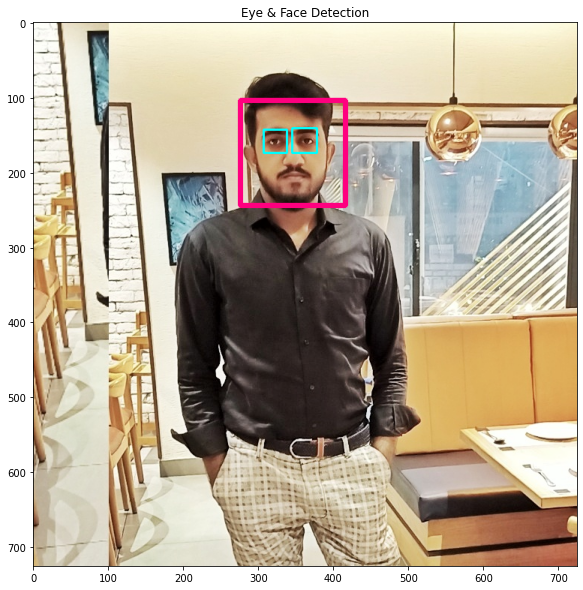

In [49]:
import numpy as np
import cv2
face_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/Haarcascades/haarcascade_eye.xml')

image = cv2.imread('/content/My Pic.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,scaleFactor=1.3,minNeighbors=5)

# When no faces detected, face_classifier returns and empty tuple

if faces is ():
  print('No Face detected')

for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),5)
  roi_gray = gray[y:y+h,x:x+w]
  roi_color=image[y:y+h,x:x+w]

  eyes = eye_classifier.detectMultiScale(roi_gray,scaleFactor=1.3,minNeighbors=5)

  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)


imshow('Eye & Face Detection',image)

## **Using Colab's Code Snippets let's access the webcam for an input**

Note: Requires your computer to have a webcam

In [42]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


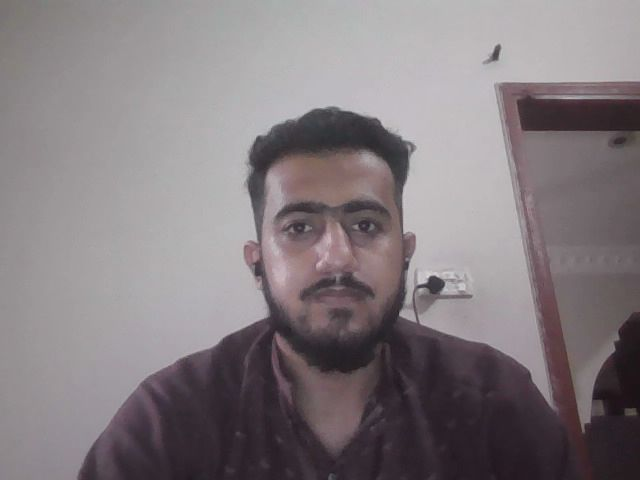

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

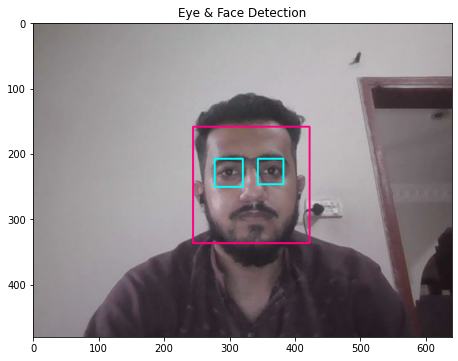

In [ ]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')
 
img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

### **Use your webcam to do live face and eye detection**

This only works on a local machine, will not work in Colab

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
            
    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow(' Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

error: ignored